In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# generate data
mean = np.array([5.0, 6.0])
cov = np.array([[1.5, 1.0], [1.0, 1.2]])
data = np.random.multivariate_normal(mean, cov, 1000)
print('Shape of data matrix: ', data.shape)

Shape of data matrix:  (1000, 2)


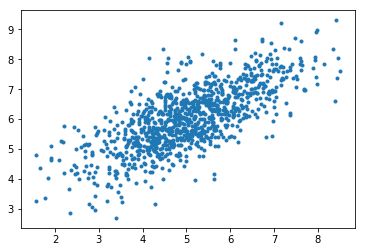

In [3]:
# visualize data
plt.scatter(data[:, 0], data[:, 1], marker = '.')
plt.show()

In [4]:
# define function to perform principal component analysis
def pca(X, explained_variance = 0.8):
    # determine covariance matrix
    C = np.cov(X, rowvar = False)
    # compute eigen-values and eigen-vectors for covariance matrix
    V, E = np.linalg.eig(C)
    # determine m = number of dimensions in reduced space
    m = 0
    variance = 0.0
    variance_ratio = V / np.sum(V)
    while(variance < explained_variance):
        variance += variance_ratio[m]
        m += 1
    # select m eigen-vectors having maximum values of their corresponding eigen-vectors
    E = E[:m, :]
    # project data onto the m dimensional space defined by E
    reduced_X = np.dot(X, E.T)
    return reduced_X

In [5]:
# using pca reduce dimensionality of data
reduced_X = pca(data, explained_variance = 0.8)
print('Shape of reduced data matrix: ', reduced_X.shape)

Shape of reduced data matrix:  (1000, 1)


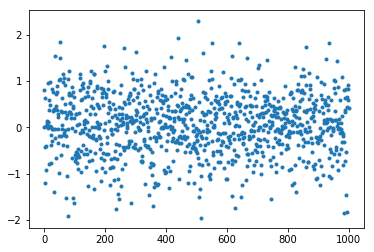

In [6]:
# visualize reduced data
plt.scatter(np.array(range(reduced_X.shape[0])), reduced_X, marker = '.')
plt.show()